# Projected Suitability of Coral Reef Habitat (Acidification)
Percentage of total reef area situated in waters where aragonite saturation state projected to fall below a threshold for suitability, aggregated by decade.

_Author: Peter Kerins_  
_Created: 28 Jan 2021_  
_Updated: 21 Apr 2021_  
_Environment: jupyterlab_  

## Style
- Original
    - [Vega chart](https://vega.github.io/editor/#/)
    - Time series
    - Vertical bar chart
    - Value showing fraction of reef area beyond threshold
    - Double bars, one for each aragonite threshold
- Revision
    - Vega chart
    - Time series
    - Vertical bar chart
    - Value is fraction beyond each threshold, for each threshold
    - Single stacked, normalized bar per decade

## Data
[ocn.calcs.004 Coral Reef Projected Acidification Areas by MEOW per Decade](https://resourcewatch.carto.com/u/wri-rw/dataset/ocn_calcs_004_reef_projected_acidification_areas_by_meow_per_de)  
from [GEE asset](https://code.earthengine.google.com/?asset=projects/resource-watch-gee/ocean-watch/calcs_reef-acidification_areas-100m)  

Calculations based on:  
- [bio.004.rw2 Coral Reef Locations](https://resourcewatch.carto.com/u/wri-rw/tables/bio_004a_coral_reef_locations_edit/)  
- [ocn.006a.rw0 Projected Ocean Acidification](https://code.earthengine.google.com/?asset=projects/resource-watch-gee/ocn_006_projected_ocean_acidification)

[Google Earth Engine calculation script](https://code.earthengine.google.com/e4b67038983d7eec477578a91d764b16?noload=true)


## Preparation

In [1]:
import json
from vega import Vega
from IPython.display import display

In [2]:
def Vega(spec):
    bundle = {}
    bundle['application/vnd.vega.v5+json'] = spec
    display(bundle, raw=True)

In [3]:
widget_width = 400
widget_height = 300

# Original version
Side-by-side double bars for each decade, corresponding to the two aragonite saturation state thresholds

## Global specification

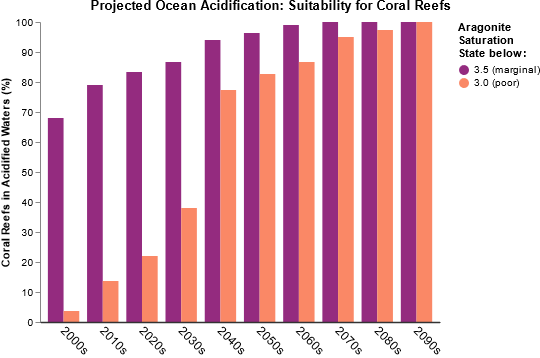

In [4]:
spec=json.loads("""
{
  "width": 300,
  "height": 300,
  "autosize": {"type": "pad", "resize": true, "contains": "padding"},
  "signals": [
    {
      "name": "hover",
      "value": null,
      "on": [
        {"events": "@cell:mouseover", "update": "datum"},
        {"events": "@cell:mouseout", "update": "null"}
      ]
    }
  ],
  "data": [
    {
      "name": "table",
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT decade_start, ass_threshold, SUM(acid_area) AS acid_area, SUM(total_area) AS total_area, SUM(acid_area)/SUM(total_area) AS acid_fraction, SUM(SUM(acid_area)/SUM(total_area)) OVER (ORDER BY decade_start) AS acid_fraction_running FROM (SELECT cartodb_id, '3.5 (marginal)' AS ass_threshold, unnest(array[2000, 2010, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090]) AS decade_start, unnest(array[_2000s_35, _2010s_35, _2020s_35, _2030s_35, _2040s_35, _2050s_35, _2060s_35, _2070s_35, _2080s_35, _2090s_35]) AS acid_area, reefarea AS total_area FROM ocn_calcs_004_reef_projected_acidification_areas_by_meow_per_decade) AS decadal_data GROUP BY decade_start, ass_threshold UNION ALL SELECT decade_start, ass_threshold, SUM(acid_area) AS acid_area, SUM(total_area) AS total_area, SUM(acid_area)/SUM(total_area) AS acid_fraction, SUM(SUM(acid_area)/SUM(total_area)) OVER (ORDER BY decade_start) AS acid_fraction_running FROM (SELECT cartodb_id, '3.0 (poor)' AS ass_threshold, unnest(array[2000, 2010, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090]) AS decade_start, unnest(array[_2000s_30, _2010s_30, _2020s_30, _2030s_30, _2040s_30, _2050s_30, _2060s_30, _2070s_30, _2080s_30, _2090s_30]) AS acid_area, reefarea AS total_area FROM ocn_calcs_004_reef_projected_acidification_areas_by_meow_per_decade) AS decadal_data GROUP BY decade_start, ass_threshold ORDER BY decade_start ASC, ass_threshold DESC",
      "format": {"type": "json", "property": "rows"},
      "transform": [
        {
          "type": "formula",
          "as": "acid_percentage",
          "expr": "datum.acid_fraction * 100.0"
        },
        {
          "type": "formula",
          "as": "acid_percentage_running",
          "expr": "datum.acid_fraction_running * 100.0"
        },
        {"type": "filter", "expr": "datum.decade_start < 2100"}
      ]
    }
  ],
  "title": "Projected Ocean Acidification: Suitability for Coral Reefs",
  "scales": [
    {
      "name": "xscale",
      "type": "band",
      "domain": {"data": "table", "field": "decade_start"},
      "range": "width",
      "padding": 0.2
    },
    {
      "name": "yscale",
      "type": "linear",
      "domain": {"data": "table", "field": "acid_percentage_running"},
      "range": "height",
      "round": true,
      "zero": true,
      "nice": true
    },
    {
      "name": "color",
      "type": "ordinal",
      "domain": {"data": "table", "field": "ass_threshold"},
      "range": [
        "#942B7F",
        "#FA8866"
      ]
    }
  ],
  "axes": [
    {
      "orient": "left",
      "scale": "yscale",
      "title": "Coral Reefs in Acidified Waters (%)"
    },
    {
      "orient": "bottom",
      "scale": "xscale",
      "tickSize": 0,
      "labelPadding": 4,
      "zindex": 1,
      "encode": {
        "labels": {
          "interactive": true,
          "update": {
            "text": {"signal": "datum.value + 's'"},
            "fill": {"value": "black"},
            "angle": {"value": 45},
            "fontSize": {"value": 12},
            "align": {"value": "left"},
            "baseline": {"value": "middle"},
            "dy": {"value": 2},
            "dx": {"value": 1}
          },
          "hover": {"fill": {"value": "firebrick"}}
        },
        "domain": {
          "update": {"stroke": {"value": "#333"}, "strokeWidth": {"value": 1.5}}
        }
      }
    }
  ],
  "marks": [
    {
      "type": "group",
      "from": {
        "facet": {"data": "table", "name": "facet", "groupby": "decade_start"}
      },
      "encode": {"enter": {"x": {"scale": "xscale", "field": "decade_start"}}},
      "signals": [{"name": "width", "update": "bandwidth('xscale')"}],
      "scales": [
        {
          "name": "pos",
          "type": "band",
          "range": "width",
          "domain": {"data": "facet", "field": "ass_threshold"}
        }
      ],
      "marks": [
        {
          "name": "bars",
          "from": {"data": "facet"},
          "type": "rect",
          "encode": {
            "enter": {
              "x": {"scale": "pos", "field": "ass_threshold"},
              "width": {"scale": "pos", "band": 1},
              "y": {"scale": "yscale", "field": "acid_percentage_running"},
              "y2": {"scale": "yscale", "value": 0},
              "fill": {"scale": "color", "field": "ass_threshold"},
              "tooltip": {
                "signal": "{title:'Coral in waters with aragonite saturation state below ' + datum.ass_threshold + ' in ' + datum.decade_start + 's', 'Fraction of global reef area':format(datum.acid_fraction_running,'.1%')}"
              }
            },
            "hover": {"fillOpacity": {"value": 0.5}},
            "update": {"fillOpacity": {"value": 1}}
          }
        }
      ]
    }
  ],
  "legends": [
    {
      "title": ["Aragonite", "Saturation", "State below:"],
      "fill": "color",
      "orient": "right"
    }
  ]
}
""")
vega_view=dict(spec)
vega_view['width']=widget_width
vega_view['height']=widget_height
Vega(vega_view)

### Resource Watch specification
API ID: 8669c45d-0950-4d53-96b2-ebdaf128c520  
https://resourcewatch.org/embed/widget/8669c45d-0950-4d53-96b2-ebdaf128c520

### Script to pass modified specification to RW via API
Based on [template in data-team-tool](https://github.com/resource-watch/data-team-tools/blob/6bf21e42d724b5f72060dd2f833864df8acad09e/map_embed_widget/embed_widget.py)

In [5]:
# import LMIPy as lmi
import os
import json
import requests
import dotenv
dotenv.load_dotenv(os.path.abspath(os.getenv('RW_ENV')))

True

In [6]:
# input widget API ID for the empty advanced widget you have created and want to overwrite
dataset_id = 'cb4db45c-e1e8-44a4-837a-e513d3c9d9fe'
widget_to_overwrite = '8669c45d-0950-4d53-96b2-ebdaf128c520'

# replace the empty dictionary with the code from the vega editor
# replace true with True and null with None
vega = {
  "width": 300,
  "height": 300,
  "autosize": {"type": "pad", "resize": True, "contains": "padding"},
  "signals": [
    {
      "name": "hover",
      "value": None,
      "on": [
        {"events": "@cell:mouseover", "update": "datum"},
        {"events": "@cell:mouseout", "update": "null"}
      ]
    }
  ],
  "data": [
    {
      "name": "table",
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT decade_start, ass_threshold, SUM(acid_area) AS acid_area, SUM(total_area) AS total_area, SUM(acid_area)/SUM(total_area) AS acid_fraction, SUM(SUM(acid_area)/SUM(total_area)) OVER (ORDER BY decade_start) AS acid_fraction_running FROM (SELECT cartodb_id, '3.5 (marginal)' AS ass_threshold, unnest(array[2000, 2010, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090]) AS decade_start, unnest(array[_2000s_35, _2010s_35, _2020s_35, _2030s_35, _2040s_35, _2050s_35, _2060s_35, _2070s_35, _2080s_35, _2090s_35]) AS acid_area, reefarea AS total_area FROM ocn_calcs_004_reef_projected_acidification_areas_by_meow_per_decade) AS decadal_data GROUP BY decade_start, ass_threshold UNION ALL SELECT decade_start, ass_threshold, SUM(acid_area) AS acid_area, SUM(total_area) AS total_area, SUM(acid_area)/SUM(total_area) AS acid_fraction, SUM(SUM(acid_area)/SUM(total_area)) OVER (ORDER BY decade_start) AS acid_fraction_running FROM (SELECT cartodb_id, '3.0 (poor)' AS ass_threshold, unnest(array[2000, 2010, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090]) AS decade_start, unnest(array[_2000s_30, _2010s_30, _2020s_30, _2030s_30, _2040s_30, _2050s_30, _2060s_30, _2070s_30, _2080s_30, _2090s_30]) AS acid_area, reefarea AS total_area FROM ocn_calcs_004_reef_projected_acidification_areas_by_meow_per_decade) AS decadal_data GROUP BY decade_start, ass_threshold ORDER BY decade_start ASC, ass_threshold DESC",
      "format": {"type": "json", "property": "rows"},
      "transform": [
        {
          "type": "formula",
          "as": "acid_percentage",
          "expr": "datum.acid_fraction * 100.0"
        },
        {
          "type": "formula",
          "as": "acid_percentage_running",
          "expr": "datum.acid_fraction_running * 100.0"
        },
        {"type": "filter", "expr": "datum.decade_start < 2100"}
      ]
    }
  ],
  "scales": [
    {
      "name": "xscale",
      "type": "band",
      "domain": {"data": "table", "field": "decade_start"},
      "range": "width",
      "padding": 0.2
    },
    {
      "name": "yscale",
      "type": "linear",
      "domain": {"data": "table", "field": "acid_percentage_running"},
      "range": "height",
      "round": True,
      "zero": True,
      "nice": True
    },
    {
      "name": "color",
      "type": "ordinal",
      "domain": {"data": "table", "field": "ass_threshold"},
      "range": [
        "#942B7F",
        "#FA8866"
      ]
    }
  ],
  "axes": [
    {
      "orient": "left",
      "scale": "yscale",
      "title": "Coral Reefs in Acidified Waters (%)"
    },
    {
      "orient": "bottom",
      "scale": "xscale",
      "tickSize": 0,
      "labelPadding": 4,
      "zindex": 1,
      "encode": {
        "labels": {
          "interactive": True,
          "update": {
            "text": {"signal": "datum.value + 's'"},
            "fill": {"value": "black"},
            "angle": {"value": 45},
            "fontSize": {"value": 12},
            "align": {"value": "left"},
            "baseline": {"value": "middle"},
            "dy": {"value": 2},
            "dx": {"value": 1}
          },
          "hover": {"fill": {"value": "firebrick"}}
        },
        "domain": {
          "update": {"stroke": {"value": "#333"}, "strokeWidth": {"value": 1.5}}
        }
      }
    }
  ],
  "marks": [
    {
      "type": "group",
      "from": {
        "facet": {"data": "table", "name": "facet", "groupby": "decade_start"}
      },
      "encode": {"enter": {"x": {"scale": "xscale", "field": "decade_start"}}},
      "signals": [{"name": "width", "update": "bandwidth('xscale')"}],
      "scales": [
        {
          "name": "pos",
          "type": "band",
          "range": "width",
          "domain": {"data": "facet", "field": "ass_threshold"}
        }
      ],
      "marks": [
        {
          "name": "bars",
          "from": {"data": "facet"},
          "type": "rect",
          "encode": {
            "enter": {
              "x": {"scale": "pos", "field": "ass_threshold"},
              "width": {"scale": "pos", "band": 1},
              "y": {"scale": "yscale", "field": "acid_percentage_running"},
              "y2": {"scale": "yscale", "value": 0},
              "fill": {"scale": "color", "field": "ass_threshold"},
              "tooltip": {
                "signal": "{'Decade':datum.decade_start + 's','ASS below':datum.ass_threshold,'Reefs':format(datum.acid_fraction_running,'.1%')}"
              }
            },
            "hover": {"fillOpacity": {"value": 0.5}},
            "update": {"fillOpacity": {"value": 1}}
          }
        }
      ]
    }
  ],
  "legends": [
    {
      "title": ["Aragonite", "Saturation", "State below:"],
      "fill": "color",
      "orient": "right"
    }
  ]
}

# create payload to send to API
# you must edit the interaction_config
payload = {
    "widgetConfig": {
        "schema": "https://vega.github.io/schema/vega/v5.json",
        **vega,
        "interaction_config": [
          {
          }
        ],
      }
    }

# load in API credentials
API_TOKEN = os.getenv('RW_API_KEY')
headers = {
'Content-Type': 'application/json',
'Authorization': 'Bearer '+API_TOKEN, 
}

# load the widget we are going to overwrite
# option 1: LMIPY
#widget = lmi.Widget(widget_to_overwrite)
# option 2: requests
url = f'http://api.resourcewatch.org/v1/dataset/{dataset_id}/widget/{widget_to_overwrite}'

# Update the widget
# option 1: LMIPY
#widget = widget.update(update_params=payload, token=API_TOKEN)
# option 2: requests
r = requests.patch(url = url, json = payload, headers = headers)
print(r)

<Response [200]>


## Regional Specification
Data aggregated by GCRMN region

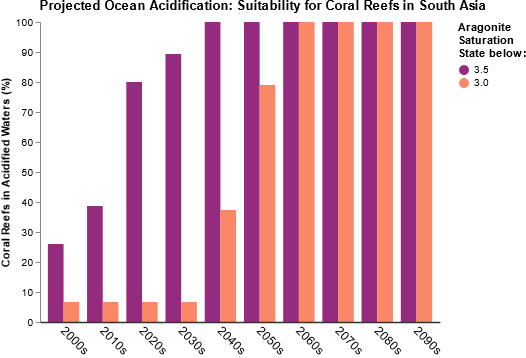

In [7]:
spec=json.loads("""
{
  "width": 300,
  "height": 250,
  "autosize": {"type": "pad", "resize": true, "contains": "padding"},
  "signals": [
    {
      "name": "hover",
      "value": null,
      "on": [
        {"events": "@cell:mouseover", "update": "datum"},
        {"events": "@cell:mouseout", "update": "null"}
      ]
    },
    {
      "name": "region_name",
      "description": "Name of GCRMN region",
      "bind": {
        "input": "select",
        "options": [
          "Australia",
          "Brazil",
          "Caribbean",
          "East Asia",
          "ETP",
          "Pacific",
          "PERSGA",
          "ROPME",
          "South Asia",
          "WIO"
        ],
        "name": "GCRMN Region "
      },
      "value": "South Asia"
    },
    {
      "name": "url_param",
      "description": "Signal-based parameterized URL for pulling data based on GCRMN region",
      "update": "'https://wri-rw.carto.com/api/v2/sql?q=SELECT gcrmn_reg, decade_start, ass_threshold, SUM(acid_area) AS acid_area, SUM(total_area) AS total_area, SUM(acid_area)/SUM(total_area) AS acid_fraction, SUM(SUM(acid_area)/SUM(total_area)) OVER (ORDER BY decade_start) AS acid_fraction_running FROM (SELECT cartodb_id, gcrmn_reg, %273.5%27 AS ass_threshold, unnest(array[2000, 2010, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090]) AS decade_start, unnest(array[_2000s_35, _2010s_35, _2020s_35, _2030s_35, _2040s_35, _2050s_35, _2060s_35, _2070s_35, _2080s_35, _2090s_35]) AS acid_area, reefarea AS total_area FROM ocn_calcs_004_reef_projected_acidification_areas_by_meow_per_decade WHERE gcrmn_reg = %27'+region_name+'%27) AS decadal_data GROUP BY decade_start, ass_threshold, gcrmn_reg UNION ALL SELECT gcrmn_reg, decade_start, ass_threshold, SUM(acid_area) AS acid_area, SUM(total_area) AS total_area, SUM(acid_area)/SUM(total_area) AS acid_fraction, SUM(SUM(acid_area)/SUM(total_area)) OVER (ORDER BY decade_start) AS acid_fraction_running FROM (SELECT cartodb_id, gcrmn_reg, %273.0%27 AS ass_threshold, unnest(array[2000, 2010, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090]) AS decade_start, unnest(array[_2000s_30, _2010s_30, _2020s_30, _2030s_30, _2040s_30, _2050s_30, _2060s_30, _2070s_30, _2080s_30, _2090s_30]) AS acid_area, reefarea AS total_area FROM ocn_calcs_004_reef_projected_acidification_areas_by_meow_per_decade WHERE gcrmn_reg = %27'+region_name+'%27) AS decadal_data GROUP BY decade_start, ass_threshold, gcrmn_reg ORDER BY gcrmn_reg ASC, ass_threshold DESC, decade_start ASC'"
    }
  ],
  "data": [
    {
      "name": "table",
      "url": {
        "signal": "url_param"
      },
      "format": {"type": "json", "property": "rows"},
      "transform": [
        {
          "type": "formula",
          "as": "acid_percentage",
          "expr": "datum.acid_fraction * 100.0"
        },
        {
          "type": "formula",
          "as": "acid_percentage_running",
          "expr": "datum.acid_fraction_running * 100.0"
        },
        {
          "type": "filter", 
          "expr": "datum.decade_start < 2100"
        },
        {
          "type": "stack",
          "groupby": ["decade_start, ass_threshold"],
          "sort": {"field": "c"},
          "field": "y"
        }
      ]
    }
  ],
  "title": {
    "text": 
      {"signal": "'Projected Ocean Acidification: Suitability for Coral Reefs in '+region_name"}
  },
  "scales": [
    {
      "name": "xscale",
      "type": "band",
      "domain": {"data": "table", "field": "decade_start"},
      "range": "width",
      "padding": 0.2
    },
    {
      "name": "yscale",
      "type": "linear",
      "domain": {"data": "table", "field": "acid_percentage_running"},
      "range": "height",
      "round": true,
      "zero": true,
      "nice": true
    },
    {
      "name": "color",
      "type": "ordinal",
      "domain": {"data": "table", "field": "ass_threshold"},
      "range": [
        "#942B7F",
        "#FA8866"
      ]
    }
  ],
  "axes": [
    {
      "orient": "left",
      "scale": "yscale",
      "title": "Coral Reefs in Acidified Waters (%)"
    },
    {
      "orient": "bottom",
      "scale": "xscale",
      "tickSize": 0,
      "labelPadding": 4,
      "zindex": 1,
      "encode": {
        "labels": {
          "interactive": true,
          "update": {
            "text": {"signal": "datum.value + 's'"},
            "fill": {"value": "black"},
            "angle": {"value": 45},
            "fontSize": {"value": 12},
            "align": {"value": "left"},
            "baseline": {"value": "middle"},
            "dy": {"value": 2},
            "dx": {"value": 1}
          },
          "hover": {"fill": {"value": "firebrick"}}
        },
        "domain": {
          "update": {"stroke": {"value": "#333"}, "strokeWidth": {"value": 1.5}}
        }
      }
    }
  ],
  "marks": [
    {
      "type": "group",
      "from": {
        "facet": {"data": "table", "name": "facet", "groupby": "decade_start"}
      },
      "encode": {"enter": {"x": {"scale": "xscale", "field": "decade_start"}}},
      "signals": [{"name": "width", "update": "bandwidth('xscale')"}],
      "scales": [
        {
          "name": "pos",
          "type": "band",
          "range": "width",
          "domain": {"data": "facet", "field": "ass_threshold"}
        }
      ],
      "marks": [
        {
          "name": "bars",
          "from": {"data": "facet"},
          "type": "rect",
          "encode": {
            "enter": {
              "x": {"scale": "pos", "field": "ass_threshold"},
              "width": {"scale": "pos", "band": 1},
              "y": {"scale": "yscale", "field": "acid_percentage_running"},
              "y2": {"scale": "yscale", "value": 0},
              "fill": {"scale": "color", "field": "ass_threshold"},
              "tooltip": {
                "signal": "{title:'Coral in waters with aragonite saturation state below ' + datum.ass_threshold + ' in ' + datum.decade_start + 's', 'Fraction of regional reef area':format(datum.acid_fraction_running,'.1%')}"
              }
            },
            "hover": {"fillOpacity": {"value": 0.5}},
            "update": {"fillOpacity": {"value": 1}}
          }
        }
      ]
    }
  ],
  "legends": [
    {
      "title": ["Aragonite", "Saturation", "State below:"],
      "fill": "color",
      "orient": "right"
    }
  ]
}
""")
vega_view=dict(spec)
vega_view['width']=widget_width
vega_view['height']=widget_height
Vega(vega_view)

---

# Revised version
Single stacked, normalized bar for each decade, with segments for area below both thresholds and below neither.

## Global

### Query

```sql
SELECT lvl1.*,
1-acid_fraction_35_running AS fraction_adequate,
acid_fraction_35_running-acid_fraction_30_running AS fraction_marginal,
acid_fraction_30_running AS fraction_poor
FROM (
  SELECT decade_start, SUM(total_area) AS total_area, SUM(acid_area_35) AS acid_area_35, SUM(acid_area_30) AS acid_area_30,
  SUM(acid_area_35)/SUM(total_area) AS acid_fraction_35, SUM(acid_area_30)/SUM(total_area) AS acid_fraction_30,
  SUM(SUM(acid_area_35)/SUM(total_area)) OVER (ORDER BY decade_start) AS acid_fraction_35_running,
  SUM(SUM(acid_area_30)/SUM(total_area)) OVER (ORDER BY decade_start) AS acid_fraction_30_running
  FROM (
    SELECT cartodb_id, gcrmn_reg, ecoregion, 
    unnest(array[2000, 2010, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090]) AS decade_start,
    unnest(array[_2000s_35, _2010s_35, _2020s_35, _2030s_35, _2040s_35, _2050s_35, _2060s_35, _2070s_35, _2080s_35, _2090s_35]) AS acid_area_35,
    unnest(array[_2000s_30, _2010s_30, _2020s_30, _2030s_30, _2040s_30, _2050s_30, _2060s_30, _2070s_30, _2080s_30, _2090s_30]) AS acid_area_30,
    reefarea AS total_area
    FROM ocn_calcs_004_reef_projected_acidification_areas_by_meow_per_decade) AS lvl0
  GROUP BY decade_start
  ORDER BY decade_start ASC) AS lvl1
```

### Specification

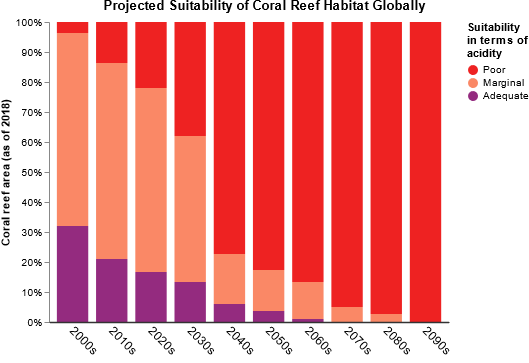

In [9]:
spec=json.loads("""
{
  "schema": "https://vega.github.io/schema/vega/v5.json",
  "description": "Projected suitability for coral reefs due to acidification",
  "width": 300,
  "height": 250,
  "padding": {
    "left": 0, 
    "top": 0, 
    "right": 0, 
    "bottom": 5
  },
  "autosize": {"type": "pad", "resize": true, "contains": "padding"},
  "signals": [
    {
      "name": "hover",
      "value": null,
      "on": [
        {"events": "@cell:mouseover", "update": "datum"},
        {"events": "@cell:mouseout", "update": "null"}
      ]
    }
  ],
  "data": [
    {
      "name": "table",
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT lvl1.*, 1-acid_fraction_35_running AS fraction_adequate, acid_fraction_35_running-acid_fraction_30_running AS fraction_marginal, acid_fraction_30_running AS fraction_poor FROM (SELECT decade_start, SUM(total_area) AS total_area, SUM(acid_area_35) AS acid_area_35, SUM(acid_area_30) AS acid_area_30, SUM(acid_area_35)/SUM(total_area) AS acid_fraction_35, SUM(acid_area_30)/SUM(total_area) AS acid_fraction_30, SUM(SUM(acid_area_35)/SUM(total_area)) OVER (ORDER BY decade_start) AS acid_fraction_35_running, SUM(SUM(acid_area_30)/SUM(total_area)) OVER (ORDER BY decade_start) AS acid_fraction_30_running FROM (SELECT cartodb_id, gcrmn_reg, ecoregion, unnest(array[2000, 2010, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090]) AS decade_start, unnest(array[_2000s_35, _2010s_35, _2020s_35, _2030s_35, _2040s_35, _2050s_35, _2060s_35, _2070s_35, _2080s_35, _2090s_35]) AS acid_area_35, unnest(array[_2000s_30, _2010s_30, _2020s_30, _2030s_30, _2040s_30, _2050s_30, _2060s_30, _2070s_30, _2080s_30, _2090s_30]) AS acid_area_30, reefarea AS total_area FROM ocn_calcs_004_reef_projected_acidification_areas_by_meow_per_decade) AS lvl0 GROUP BY decade_start ORDER BY decade_start ASC) AS lvl1",
      "format": {"type": "json", "property": "rows"},
      "transform": [
        {
          "type": "formula",
          "expr": "datum.fraction_adequate+datum.fraction_marginal",
          "as": "sum_marginal"
        }
      ]
    }
  ],
  "title": {
    "text": 
      {"signal": "'Projected Suitability of Coral Reef Habitat Globally'"}
  },
  "scales": [
    {
      "name": "xscale",
      "type": "band",
      "domain": {"data": "table", "field": "decade_start"},
      "range": "width",
      "padding": 0.2
    },
    {
      "name": "yscale",
      "type": "linear",
      "domain": [0,1],
      "range": "height",
      "round": true,
      "zero": true,
      "nice": true
    },
    {
      "name": "color",
      "type": "ordinal",
      "domain": [
        "Poor",
        "Marginal",
        "Adequate"
      ],
      "range": [
        "#EE2222",
        "#FA8866",
        "#942B7F"
      ]
    }
  ],
  "axes": [
    {
      "orient": "left",
      "scale": "yscale",
      "title": "Coral reef area (as of 2018)",
      "format": "%"
    },
    {
      "orient": "bottom",
      "scale": "xscale",
      "tickSize": 0,
      "labelPadding": 4,
      "zindex": 1,
      "encode": {
        "labels": {
          "interactive": true,
          "update": {
            "text": {"signal": "datum.value + 's'"},
            "fill": {"value": "black"},
            "angle": {"value": 45},
            "fontSize": {"value": 12},
            "align": {"value": "left"},
            "baseline": {"value": "middle"},
            "dy": {"value": 2},
            "dx": {"value": 1}
          },
          "hover": {"fill": {"value": "firebrick"}}
        },
        "domain": {
          "update": {"stroke": {"value": "#333"}, "strokeWidth": {"value": 1.5}}
        }
      }
    }
  ],
  "marks": [
    {
      "name": "bars_adequate",
      "from": {"data": "table"},
      "type": "rect",
      "encode": {
        "enter": {
          "x": {"scale": "xscale", "field": "decade_start"},
          "width": {"scale": "xscale", "band": 1},
          "y": {"scale": "yscale", "value": 0},
          "y2": {"scale": "yscale", "field": "fraction_adequate"},
          "fill": {"scale": "color", "value": "Adequate"},
          "tooltip": {
            "signal": "{title:'Adequate suitability for coral', 'Decade':datum.decade_start+'s', 'Aragonite saturation state':'Above 3.5', 'Fraction of global reef area':format(datum.fraction_adequate,'.1%')}"
          }
        },
        "hover": {"fillOpacity": {"value": 0.5}},
        "update": {"fillOpacity": {"value": 1}}
      }
    },
    {
      "name": "bars_marginal",
      "from": {"data": "table"},
      "type": "rect",
      "encode": {
        "enter": {
          "x": {"scale": "xscale", "field": "decade_start"},
          "width": {"scale": "xscale", "band": 1},
          "y": {"scale": "yscale", "field": "fraction_adequate"},
          "y2": {
            "scale": "yscale", 
            "field": "sum_marginal"
          },
          "fill": {"scale": "color", "value": "Marginal"},
          "tooltip": {
            "signal": "{title:'Marginal suitability for coral', 'Decade':datum.decade_start+'s', 'Aragonite saturation state':'Between 3.0 and 3.5', 'Fraction of global reef area':format(datum.fraction_marginal,'.1%')}"
          }
        },
        "hover": {"fillOpacity": {"value": 0.5}},
        "update": {"fillOpacity": {"value": 1}}
      }
    },
    {
      "name": "bars_poor",
      "from": {"data": "table"},
      "type": "rect",
      "encode": {
        "enter": {
          "x": {"scale": "xscale", "field": "decade_start"},
          "width": {"scale": "xscale", "band": 1},
          "y": {"scale": "yscale", "field": "sum_marginal"},
          "y2": {
            "scale": "yscale", 
            "value": 1
          },
          "fill": {"scale": "color", "value": "Poor"},
          "tooltip": {
            "signal": "{title:'Poor suitability for coral', 'Decade':datum.decade_start+'s', 'Aragonite saturation state':'Below 3.0', 'Fraction of global reef area':format(datum.fraction_poor,'.1%')}"
          }
        },
        "hover": {"fillOpacity": {"value": 0.5}},
        "update": {"fillOpacity": {"value": 1}}
      }
    }
  ],
  "legends": [
    {
      "title": ["Suitability", "in terms of", "acidity"],
      "fill": "color",
      "orient": "right"
    }
  ]
}
""")
vega_view=dict(spec)
vega_view['width']=widget_width
vega_view['height']=widget_height
Vega(vega_view)

### RW API
Parent dataset [ocn.006b.rw0 Projected Ocean Acidification: Suitability for Coral Reefs](https://resourcewatch.org/data/explore/cb4db45c-e1e8-44a4-837a-e513d3c9d9fe) ([Admin](https://resourcewatch.org/admin/data/datasets/cb4db45c-e1e8-44a4-837a-e513d3c9d9fe/edit))    
[API ID](https://api.resourcewatch.org/v1/dataset/cb4db45c-e1e8-44a4-837a-e513d3c9d9fe/) `cb4db45c-e1e8-44a4-837a-e513d3c9d9fe`  
[Widgets](https://api.resourcewatch.org/v1/dataset/cb4db45c-e1e8-44a4-837a-e513d3c9d9fe/widget?page[size]=100)

Lightly modified version of widget passed to API via [widget script](https://github.com/resource-watch/data-team-tools/blob/master/advanced_widget_writer/advanced_chart_widget_create.py). Key variables to modify in script, besides specification itself:

In [21]:
dataset_id = 'cb4db45c-e1e8-44a4-837a-e513d3c9d9fe'
name = 'Projected Suitability of Coral Reef Habitat Globally'
description = 'Projected suitability for coral reefs due to acidification'

- [Global](https://api.resourcewatch.org/v1/widget/9ef04f1b-b96f-4002-8426-3d55ca5bdef3?env=production)  `9ef04f1b-b96f-4002-8426-3d55ca5bdef3`  

## Regional

### SQL
For example, `gcrmn_reg = 'South Asia'`

```sql
SELECT lvl1.*,
1-acid_fraction_35_running AS fraction_adequate,
acid_fraction_35_running-acid_fraction_30_running AS fraction_marginal,
acid_fraction_30_running AS fraction_poor
FROM (
  SELECT gcrmn_reg, decade_start, SUM(total_area) AS total_area, SUM(acid_area_35) AS acid_area_35, SUM(acid_area_30) AS acid_area_30,
  SUM(acid_area_35)/SUM(total_area) AS acid_fraction_35, SUM(acid_area_30)/SUM(total_area) AS acid_fraction_30,
  SUM(SUM(acid_area_35)/SUM(total_area)) OVER (PARTITION BY gcrmn_reg ORDER BY decade_start) AS acid_fraction_35_running,
  SUM(SUM(acid_area_30)/SUM(total_area)) OVER (PARTITION BY gcrmn_reg ORDER BY decade_start) AS acid_fraction_30_running
  FROM (
    SELECT cartodb_id, gcrmn_reg, ecoregion, 
    unnest(array[2000, 2010, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090]) AS decade_start,
    unnest(array[_2000s_35, _2010s_35, _2020s_35, _2030s_35, _2040s_35, _2050s_35, _2060s_35, _2070s_35, _2080s_35, _2090s_35]) AS acid_area_35,
    unnest(array[_2000s_30, _2010s_30, _2020s_30, _2030s_30, _2040s_30, _2050s_30, _2060s_30, _2070s_30, _2080s_30, _2090s_30]) AS acid_area_30,
    reefarea AS total_area
    FROM ocn_calcs_004_reef_projected_acidification_areas_by_meow_per_decade
    WHERE gcrmn_reg = 'South Asia') AS lvl0
  GROUP BY gcrmn_reg, decade_start
  ORDER BY gcrmn_reg ASC, decade_start ASC) AS lvl1
```

### Specification

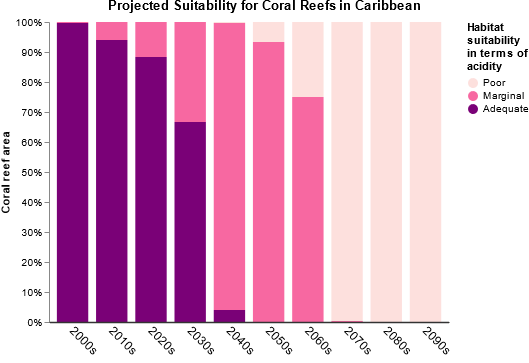

In [9]:
spec=json.loads("""
{
  "$schema": "https://vega.github.io/schema/vega/v5.json",
  "description": "Projected suitability for coral reefs due to acidification ",
  "width": 300,
  "height": 250,
  "padding": {
    "left": 0, 
    "top": 0, 
    "right": 0, 
    "bottom": 5
  },
  "autosize": {"type": "pad", "resize": true, "contains": "padding"},
  "signals": [
    {
      "name": "hover",
      "value": null,
      "on": [
        {"events": "@cell:mouseover", "update": "datum"},
        {"events": "@cell:mouseout", "update": "null"}
      ]
    },
    {
      "name": "region_name",
      "description": "Name of GCRMN region",
      "bind": {
        "input": "select",
        "options": [
          "Australia",
          "Brazil",
          "Caribbean",
          "East Asia",
          "ETP",
          "Pacific",
          "PERSGA",
          "ROPME",
          "South Asia",
          "WIO"
        ],
        "name": "GCRMN Region "
      },
      "value": "Caribbean"
    },
    {
      "name": "url_param",
      "description": "Signal-based parameterized URL for pulling data based on GCRMN region",
      "update": "'https://wri-rw.carto.com/api/v2/sql?q=SELECT lvl1.*, 1 - acid_fraction_35_running AS fraction_adequate,acid_fraction_35_running - acid_fraction_30_running AS fraction_marginal, acid_fraction_30_running AS fraction_poor FROM (SELECT gcrmn_reg, decade_start, SUM(total_area) AS total_area, SUM(acid_area_35) AS acid_area_35, SUM(acid_area_30) AS acid_area_30, SUM(acid_area_35)/SUM(total_area) AS acid_fraction_35, SUM(acid_area_30)/SUM(total_area) AS acid_fraction_30, SUM(SUM(acid_area_35)/SUM(total_area)) OVER (PARTITION BY gcrmn_reg ORDER BY decade_start) AS acid_fraction_35_running, SUM(SUM(acid_area_30)/SUM(total_area)) OVER (PARTITION BY gcrmn_reg ORDER BY decade_start) AS acid_fraction_30_running FROM (SELECT cartodb_id, gcrmn_reg, ecoregion, unnest(array[2000, 2010, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090]) AS decade_start, unnest(array[_2000s_35, _2010s_35, _2020s_35, _2030s_35, _2040s_35, _2050s_35, _2060s_35, _2070s_35, _2080s_35, _2090s_35]) AS acid_area_35, unnest(array[_2000s_30, _2010s_30, _2020s_30, _2030s_30, _2040s_30, _2050s_30, _2060s_30, _2070s_30, _2080s_30, _2090s_30]) AS acid_area_30, reefarea AS total_area FROM ocn_calcs_004_reef_projected_acidification_areas_by_meow_per_decade WHERE gcrmn_reg = %27'+region_name+'%27) AS lvl0 GROUP BY gcrmn_reg, decade_start ORDER BY gcrmn_reg ASC, decade_start ASC) AS lvl1 '"
    }
  ],
  "data": [
    {
      "name": "table",
      "url": {
        "signal": "url_param"
      },
      "format": {"type": "json", "property": "rows"},
      "transform": [
        {
          "type": "formula",
          "expr": "datum.fraction_adequate+datum.fraction_marginal",
          "as": "sum_marginal"
        }
      ]
    }
  ],
  "title": {
    "text": 
      {"signal": "'Projected Suitability for Coral Reefs in '+region_name"}
  },
  "scales": [
    {
      "name": "xscale",
      "type": "band",
      "domain": {"data": "table", "field": "decade_start"},
      "range": "width",
      "padding": 0.2
    },
    {
      "name": "yscale",
      "type": "linear",
      "domain": [0,1],
      "range": "height",
      "round": true,
      "zero": true,
      "nice": true
    },
    {
      "name": "color",
      "type": "ordinal",
      "domain": [
        "Poor",
        "Marginal",
        "Adequate"
      ],
      "range": [
        "#fde0dd",
        "#f768a1",
        "#7a0177"
      ]
    }
  ],
  "axes": [
    {
      "orient": "left",
      "scale": "yscale",
      "title": "Coral reef area",
      "format": "%"
    },
    {
      "orient": "bottom",
      "scale": "xscale",
      "tickSize": 0,
      "labelPadding": 4,
      "zindex": 1,
      "encode": {
        "labels": {
          "interactive": true,
          "update": {
            "text": {"signal": "datum.value + 's'"},
            "fill": {"value": "black"},
            "angle": {"value": 45},
            "fontSize": {"value": 12},
            "align": {"value": "left"},
            "baseline": {"value": "middle"},
            "dy": {"value": 2},
            "dx": {"value": 1}
          },
          "hover": {"fill": {"value": "firebrick"}}
        },
        "domain": {
          "update": {"stroke": {"value": "#333"}, "strokeWidth": {"value": 1.5}}
        }
      }
    }
  ],
  "marks": [
    {
      "name": "bars_adequate",
      "from": {"data": "table"},
      "type": "rect",
      "encode": {
        "enter": {
          "x": {"scale": "xscale", "field": "decade_start"},
          "width": {"scale": "xscale", "band": 1},
          "y": {"scale": "yscale", "value": 0},
          "y2": {"scale": "yscale", "field": "fraction_adequate"},
          "fill": {"scale": "color", "value": "Adequate"},
          "tooltip": {
            "signal": "{title:'Adequate suitability for coral', 'Decade':datum.decade_start+'s', 'Aragonite saturation state':'Above 3.5', 'Fraction of regional reef area':format(datum.fraction_adequate,'.1%')}"
          }
        },
        "hover": {"fillOpacity": {"value": 0.5}},
        "update": {"fillOpacity": {"value": 1}}
      }
    },
    {
      "name": "bars_marginal",
      "from": {"data": "table"},
      "type": "rect",
      "encode": {
        "enter": {
          "x": {"scale": "xscale", "field": "decade_start"},
          "width": {"scale": "xscale", "band": 1},
          "y": {"scale": "yscale", "field": "fraction_adequate"},
          "y2": {
            "scale": "yscale", 
            "field": "sum_marginal"
          },
          "fill": {"scale": "color", "value": "Marginal"},
          "tooltip": {
            "signal": "{title:'Marginal suitability for coral', 'Decade':datum.decade_start+'s', 'Aragonite saturation state':'Between 3.0 and 3.5', 'Fraction of regional reef area':format(datum.fraction_marginal,'.1%')}"
          }
        },
        "hover": {"fillOpacity": {"value": 0.5}},
        "update": {"fillOpacity": {"value": 1}}
      }
    },
    {
      "name": "bars_poor",
      "from": {"data": "table"},
      "type": "rect",
      "encode": {
        "enter": {
          "x": {"scale": "xscale", "field": "decade_start"},
          "width": {"scale": "xscale", "band": 1},
          "y": {"scale": "yscale", "field": "sum_marginal"},
          "y2": {
            "scale": "yscale", 
            "value": 1
          },
          "fill": {"scale": "color", "value": "Poor"},
          "tooltip": {
            "signal": "{title:'Poor suitability for coral', 'Decade':datum.decade_start+'s', 'Aragonite saturation state':'Below 3.0', 'Fraction of regional reef area':format(datum.fraction_poor,'.1%')}"
          }
        },
        "hover": {"fillOpacity": {"value": 0.5}},
        "update": {"fillOpacity": {"value": 1}}
      }
    }
  ],
  "legends": [
    {
      "title": ["Habitat", "suitability", "in terms of", "acidity"],
      "fill": "color",
      "orient": "right"
    }
  ]
}
""")
vega_view=dict(spec)
vega_view['width']=widget_width
vega_view['height']=widget_height
Vega(vega_view)